<a href="https://colab.research.google.com/github/GaneshkumarPatel/cohort_kaimur-capstone_eda_project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **INTRODUCTION :**

This project is related to apps data in play store,which has enormus potential to drive the business of app-making in successive direction.And the main objective of this project to show the interest of customers.Also their demands towards the apps by exploring and analyze the data to discover key factors responsible for app engagement and success,which help developers to popularize the products .





#**Dataset Description**
#A. Main Dataset

This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

**App**: It defines App name.

**Category**: Category of the app. This could be beauty, business, entertainment, education...etc.

**Rating**: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews**: The number of user reviews each app has received.

**Size**: The memory size needed to install the application.

**Installs**: The number of times each application has been installed by users.

**Type**: Whether the app is free or a paid app.

**Price**: The price of the app.

**Content Rating**: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

**Genres**: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

**Last Updated**: Release date of the most recent update for the app.

**Current Ver**: The app's current version.

**Android Ver**: The oldest version of Android OS supported by the app.

#B. Review Dataset
This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#defining working path
working_path='/content/drive/My Drive/capstone data/'

In [5]:
#loading csv files required for EDA
df1=pd.read_csv(working_path+'Play Store Data.csv')
df2=pd.read_csv(working_path+'User Reviews.csv')

In [6]:
#looking for top 5 rows
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#looking for last 5 rows

df1.tail()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
#Checking Number of columns and rows
df1.shape

(10841, 13)

In [9]:
#looking for info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Task: 2. Data clean up and correcting the data types

In [10]:
#droping duplicate values
df1.drop_duplicates(inplace=True)
df1.reset_index(inplace=True,drop=True)

In [11]:
# define a function to get more info from dataset

def infodata(df):
  infodf=pd.DataFrame()
  infodf['App']=df.columns
  infodf['count_of_NaN_values']=df.isnull().sum().values
  infodf['unique_number_of_daata']=df.nunique().values
  infodf['datatype']=df.dtypes.values
  return infodf

In [12]:
#checking more info using defined function
infodata(df1)

,App,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9660,object
1,Category,0,34,object
2,Rating,1465,40,float64
3,Reviews,0,6002,object
4,Size,0,462,object
5,Installs,0,22,object
6,Type,1,3,object
7,Price,0,93,object
8,Content Rating,1,6,object
9,Genres,0,120,object


From above it is clear that our dataset 'Rating' column contains lots of null values and 'Content Rating','Current Ver','Android Ver' columns contains very small amount of null values comparing to data we will try to impute or delete those values using best possible way

In [13]:
df1[df1['Content Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df1.drop(df1.index[9990],axis=0,inplace=True)

In [15]:
#filling na values using fillna method

df1.Rating.fillna(df1.Rating.median(),inplace=True)

In [16]:
# Converting KB to MB 
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))


In [17]:
df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)

In [30]:
df1["Price"] = df1["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

In [31]:
df1['Reviews']=pd.to_numeric(df1['Reviews'])
df1['Installs']=pd.to_numeric(df1['Installs'])
df1['Size']=pd.to_numeric(df1['Size'])
df1['Price']=pd.to_numeric(df1['Price'])

In [32]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04,10356.000000
mean,4.203727,4.059438e+05,20.067028,1.415913e+07,1.030900
std,0.485617,2.696905e+06,21.020893,8.024331e+07,16.279408
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.683000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.643825e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [20]:
df1.Size.fillna(df1.Size.median(),inplace=True)

In [21]:
df1.drop(['Current Ver','Android Ver'],axis=1,inplace=True)
df1.dropna(inplace=True)


In [22]:
infodata(df1)

,App,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,9658,object
1,Category,0,33,object
2,Rating,0,39,float64
3,Reviews,0,6001,int64
4,Size,0,459,float64
5,Installs,0,20,int64
6,Type,0,2,object
7,Price,0,92,object
8,Content Rating,0,6,object
9,Genres,0,119,object


In [23]:
df1.describe()

,Rating,Reviews,Size,Installs
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04
mean,4.203727,4.059438e+05,20.067028,1.415913e+07
std,0.485617,2.696905e+06,21.020893,8.024331e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.100000,3.200000e+01,5.700000,1.000000e+03
50%,4.300000,1.683000e+03,13.000000,1.000000e+05
75%,4.500000,4.643825e+04,26.000000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


#Exploratory Analysis


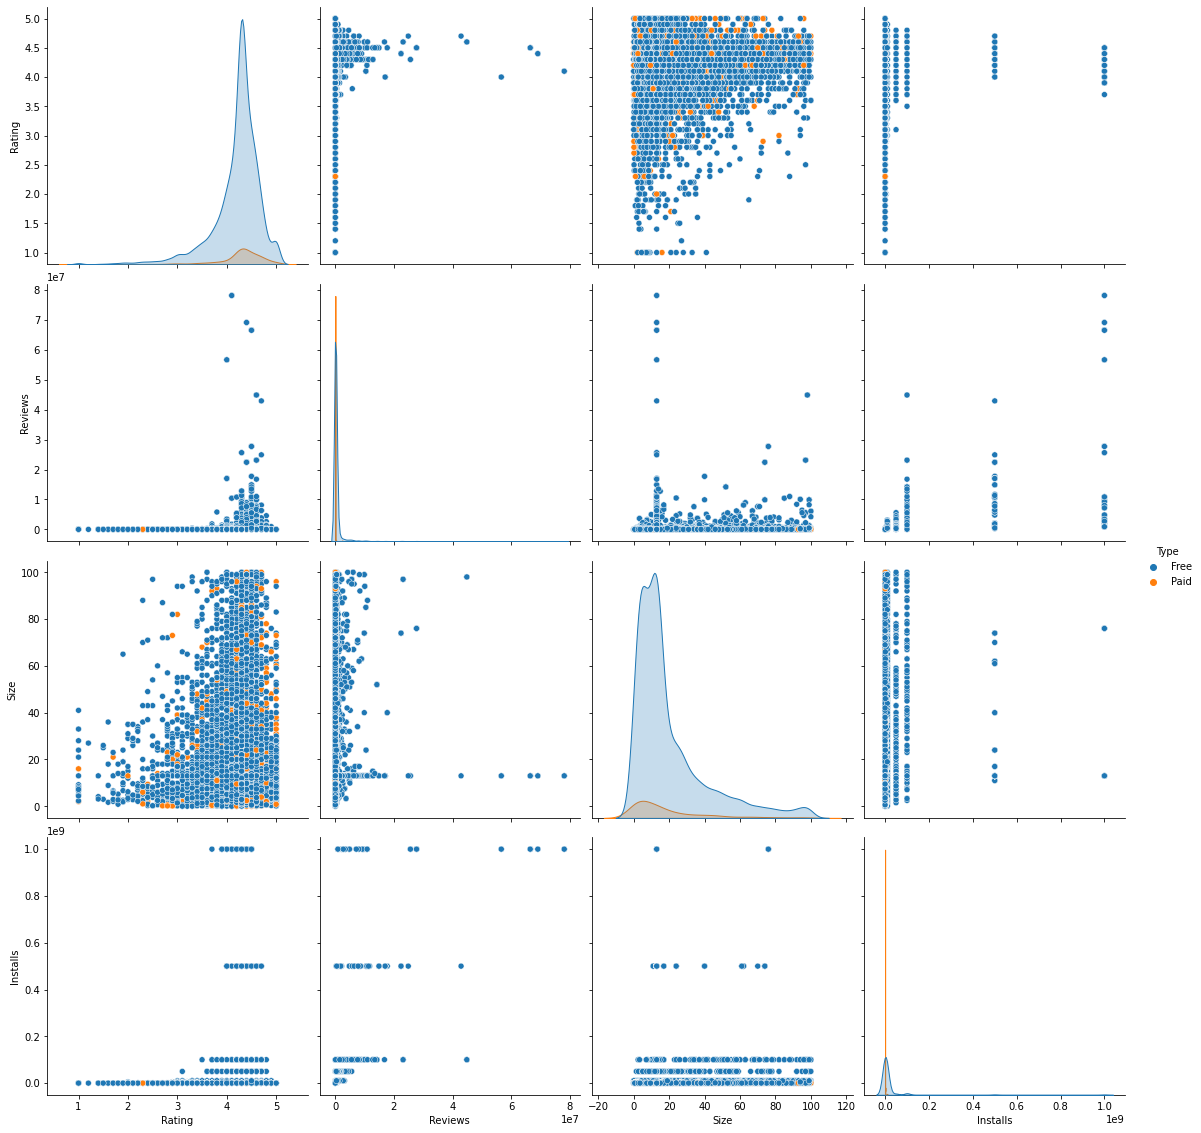

In [24]:
# pairplot to understand univariate analysis of some numeric variables
sns.pairplot(df1, hue='Type',height=4)

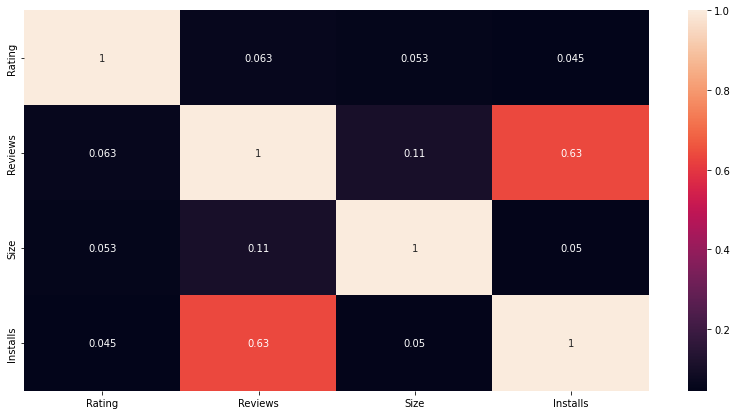

In [25]:
plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(),annot=True)

from above pairplot and heatmap we can get following observations:
1. With increase in reviews Installs gets increased. That means Reviews and Installs are positively corelated.
3. installs of app doesnt depends on size.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


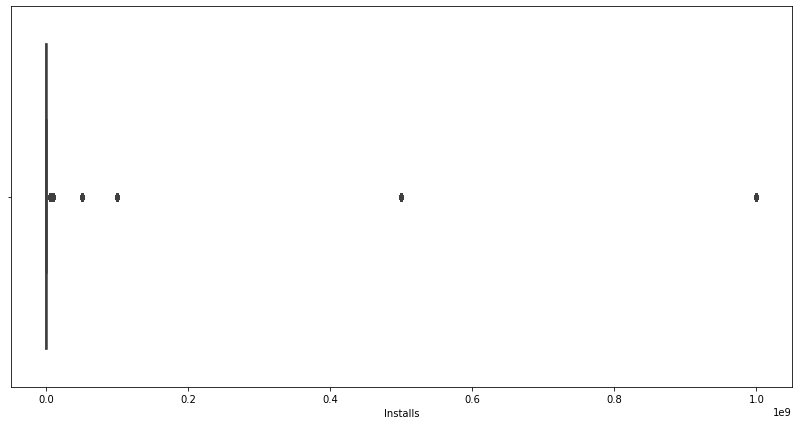

In [26]:
#just look the distribution of Installs data
plt.figure(figsize=(14,7))
sns.boxplot(df1.Installs)

from above we came to know some of apps having maximum installs just have a look on them

In [27]:

df1[df1.Installs>0.2e09].sort_values(by='Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,13.0,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018"
2731,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,13.0,1000000000,Free,0,Everyone,Travel & Local,"August 6, 2018"
3102,Google Drive,PRODUCTIVITY,4.4,2731211,13.0,1000000000,Free,0,Everyone,Productivity,"August 6, 2018"
3035,Google Drive,PRODUCTIVITY,4.4,2731171,13.0,1000000000,Free,0,Everyone,Productivity,"August 6, 2018"
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,13.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
3148,Cloud Print,PRODUCTIVITY,4.1,282460,13.0,500000000,Free,0,Everyone,Productivity,"May 23, 2018"
383,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40.0,500000000,Free,0,Teen,Communication,"August 2, 2018"
3277,MX Player,VIDEO_PLAYERS,4.5,6474426,13.0,500000000,Free,0,Everyone,Video Players & Editors,"August 6, 2018"
1669,Temple Run 2,GAME,4.3,8119151,62.0,500000000,Free,0,Everyone,Action,"July 5, 2018"


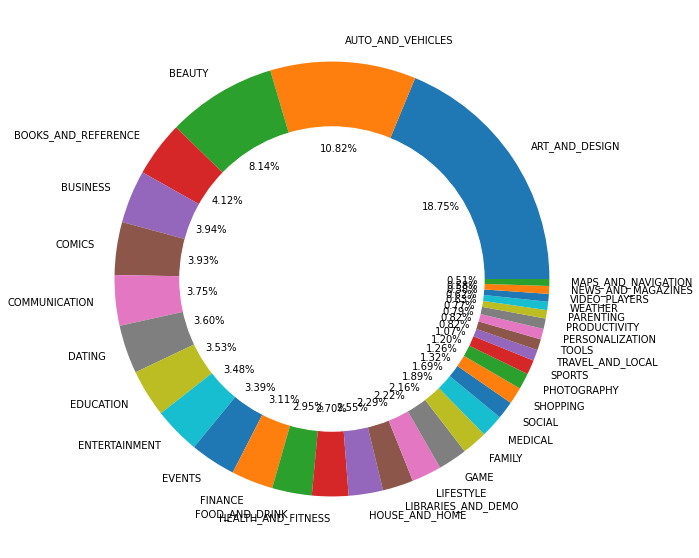

In [43]:
plt.figure(figsize=(20,10))

plt.pie(df1.Category.value_counts(),labels=df1.Category.unique(), autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

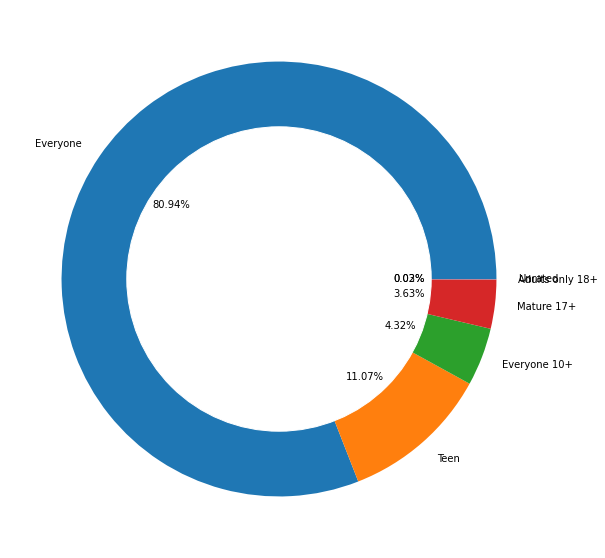

In [35]:
plt.figure(figsize=(18,10))

plt.pie(df1['Content Rating'].value_counts(),labels=df1['Content Rating'].unique(), autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

As we can see in the above pie chart Apps having content rating Everyone is having Majority and followed by Teen.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


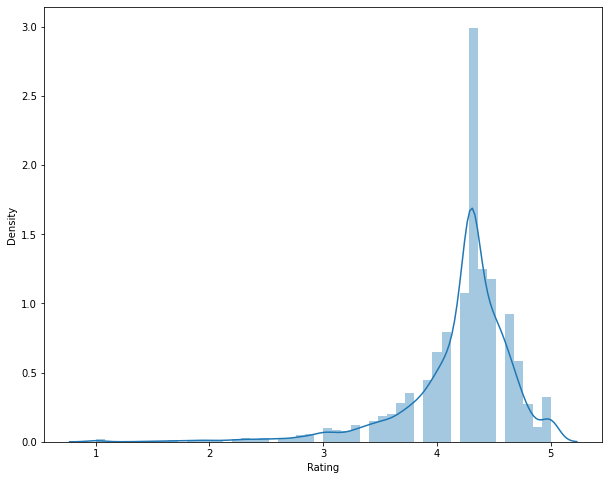

In [41]:
plt.figure(figsize=(10,8))
sns.distplot(df1.Rating)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

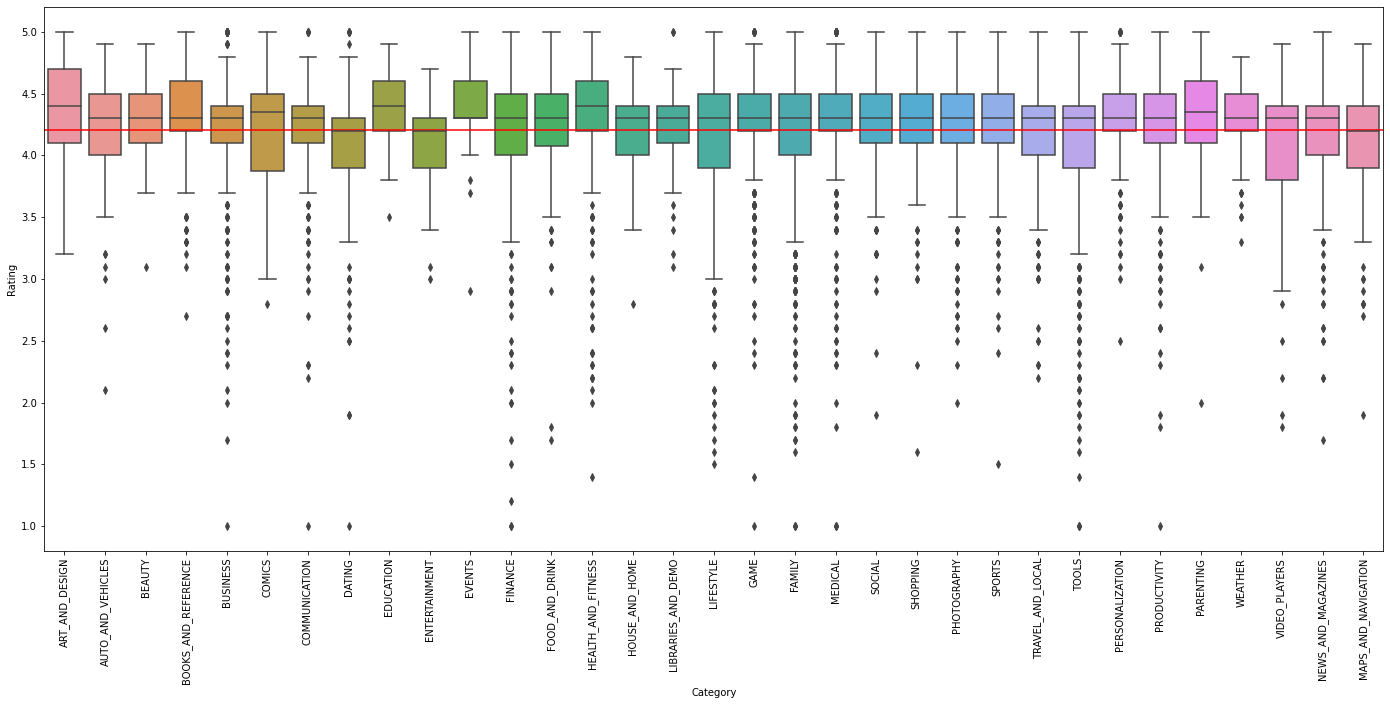

In [39]:
plt.figure(figsize=(24,10))


val = sns.boxplot(data=df1, x="Category", y="Rating")
val.axhline(df1['Rating'].mean(),ls="-",color="red")
plt.xticks(rotation=90)

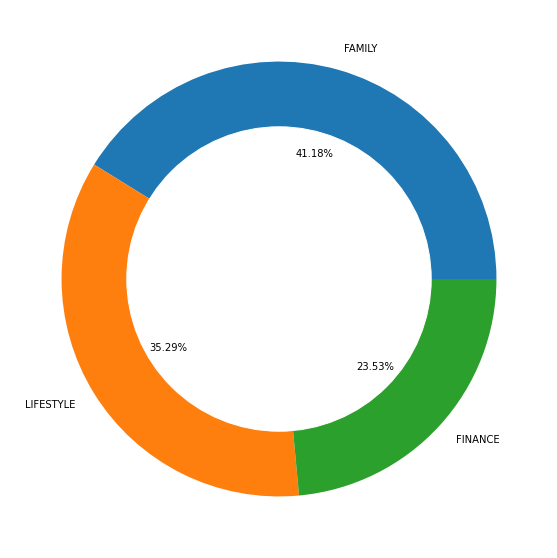

In [60]:
expensive_apps=df1[df1.Price>200]
plt.figure(figsize=(20,10))

plt.pie(expensive_apps.Category.value_counts(),labels=expensive_apps.Category.unique(), autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Data Exploration

## Q1) Which are the top 20 Genres that are getting installed the most?

In [208]:
top_20_genres_by_install=df1.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(20)

In [209]:
top_20_genres_by_install.values

array([24152276251, 12513867902, 12463091369, 11442771915,  9721247655,
        9717129155,  8662830740,  8336039190,  6361787146,  6207002720,
        5393217760,  4680714684,  2573348785,  2544574498,  2074494782,
        2000247320,  1916469576,  1774187605,  1552476811,  1361022512])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


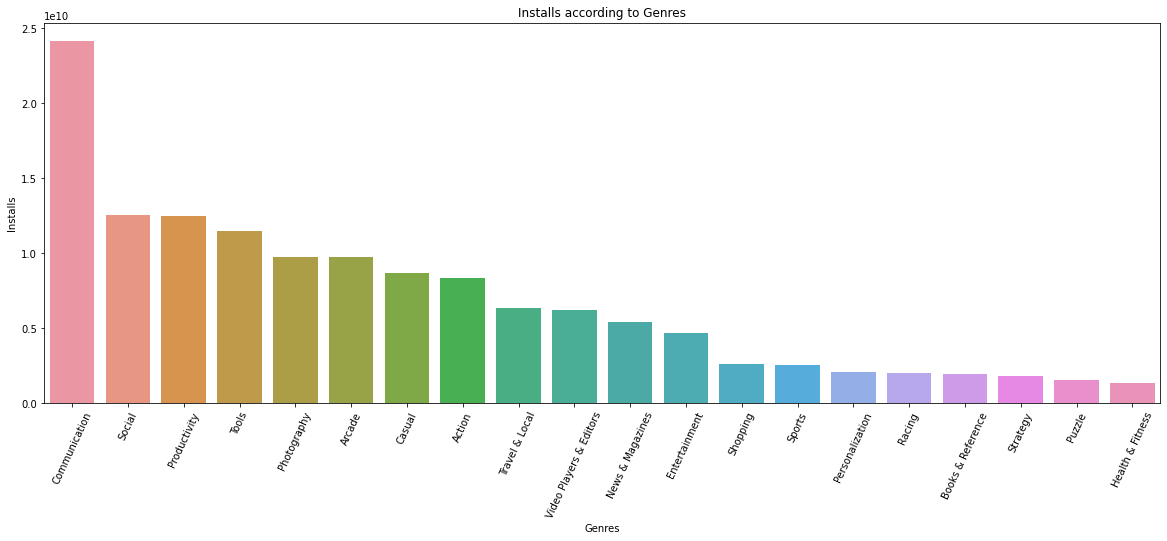

In [210]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_by_install.index,top_20_genres_by_install.values)

Top 20 Genres having maximum paid apps?

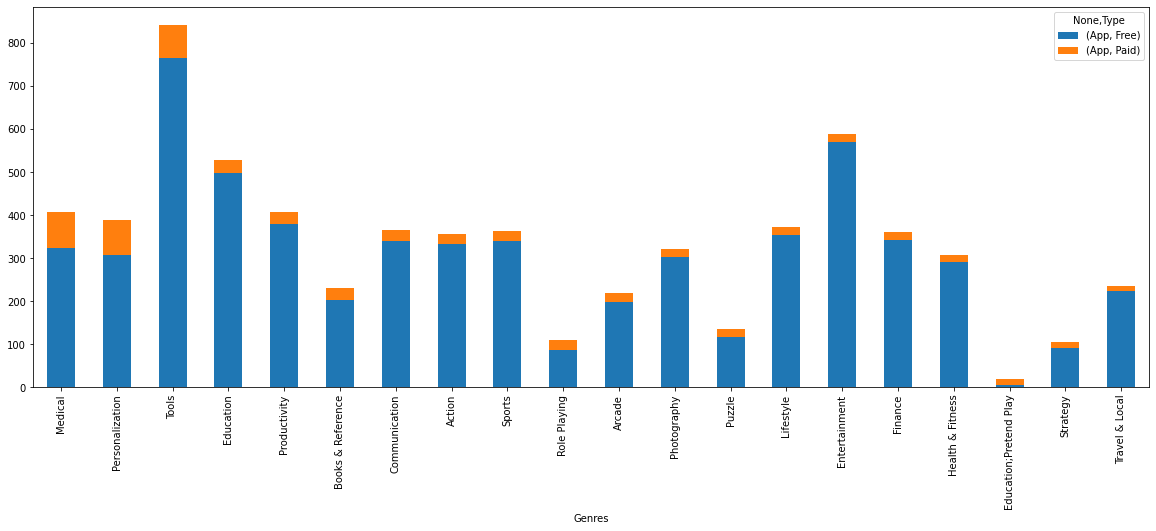

In [211]:
app_count_by_genres_sorted_by_paid=df1.groupby(['Genres','Type'])[['App']].count().unstack().sort_values(by=[('App', 'Paid')],ascending=False).head(20)
app_count_by_genres_sorted_by_paid.plot(kind='bar',stacked=True, figsize=(20,7))

## Q2) 

In [212]:
top_20_geners_having_maxx_apps=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


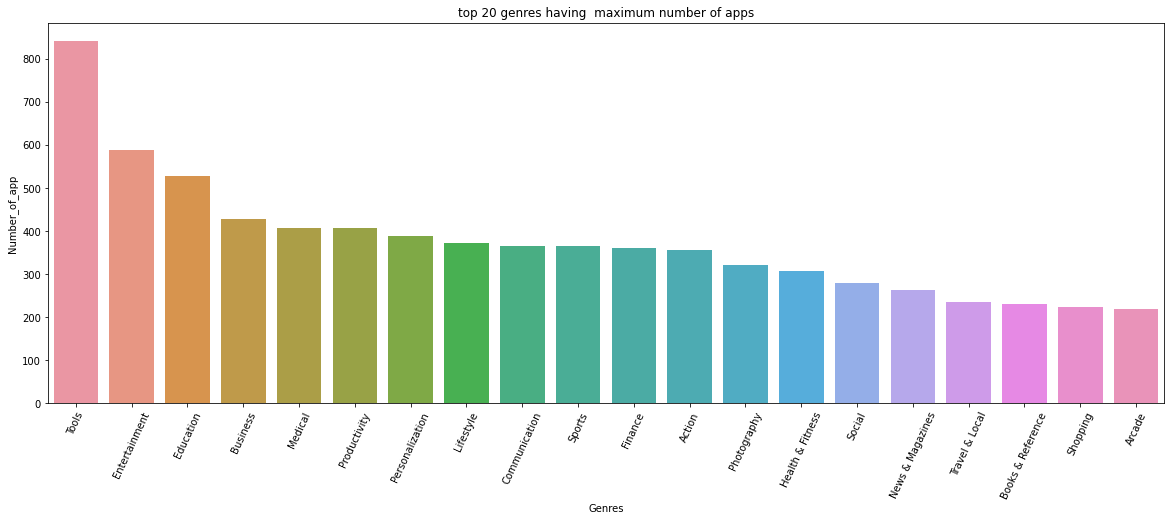

In [213]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number_of_app")
plt.title("top 20 genres having  maximum number of apps")
sns.barplot(top_20_geners_having_maxx_apps.index,top_20_geners_having_maxx_apps.values)

In [214]:
top_20_apps_by_=df1.groupby('Genres')['App'].count().sort_values(ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


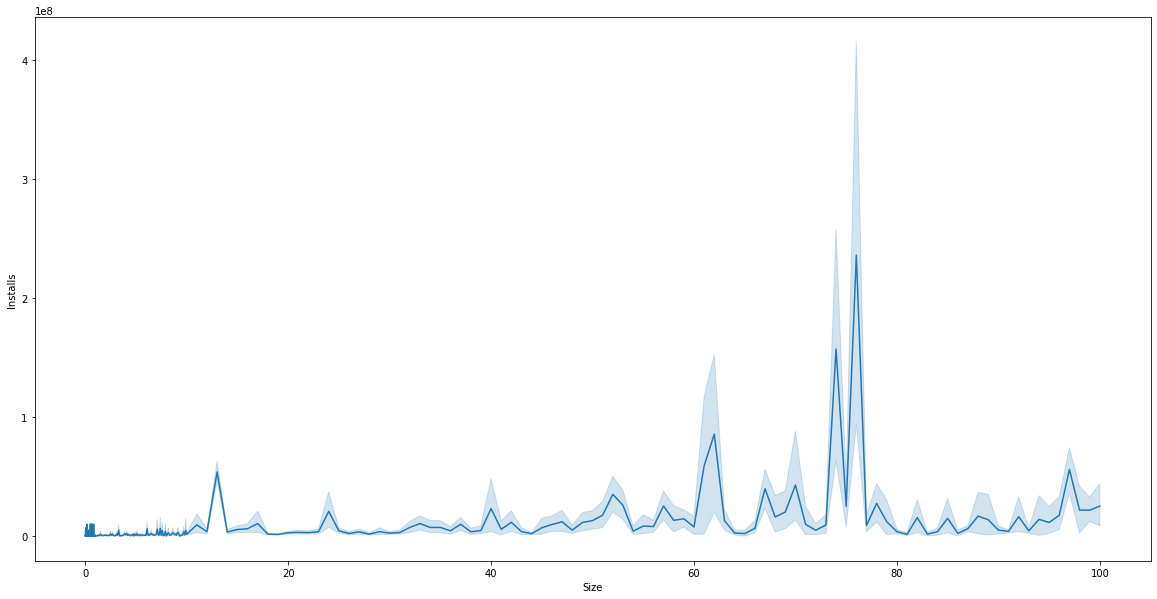

In [215]:
plt.figure(figsize=(20,10))
sns.lineplot(df1['Size'],df1['Installs'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


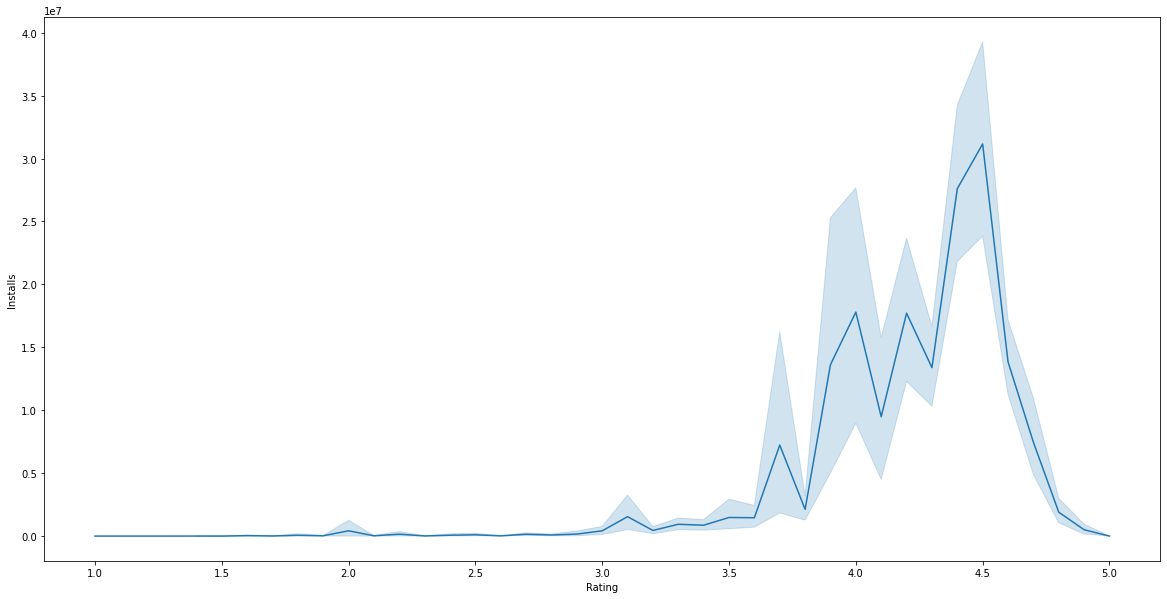

In [216]:
plt.figure(figsize=(20,10))
sns.lineplot(df1['Rating'],df1['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


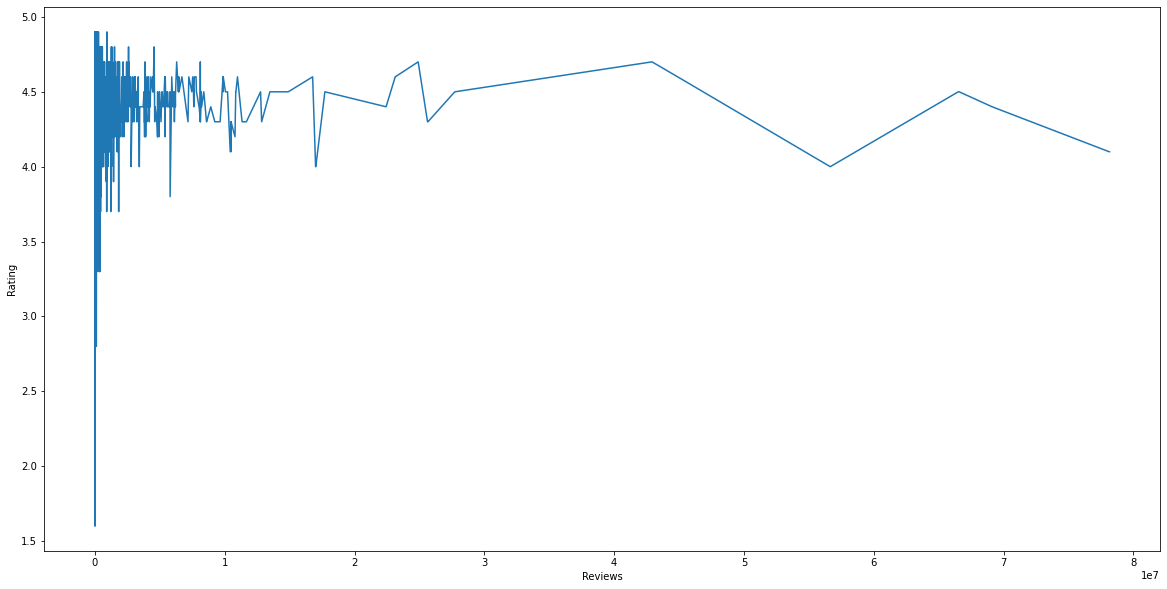

In [217]:
plt.figure(figsize=(20,10))
sns.lineplot(df1['Reviews'],df1['Rating'])

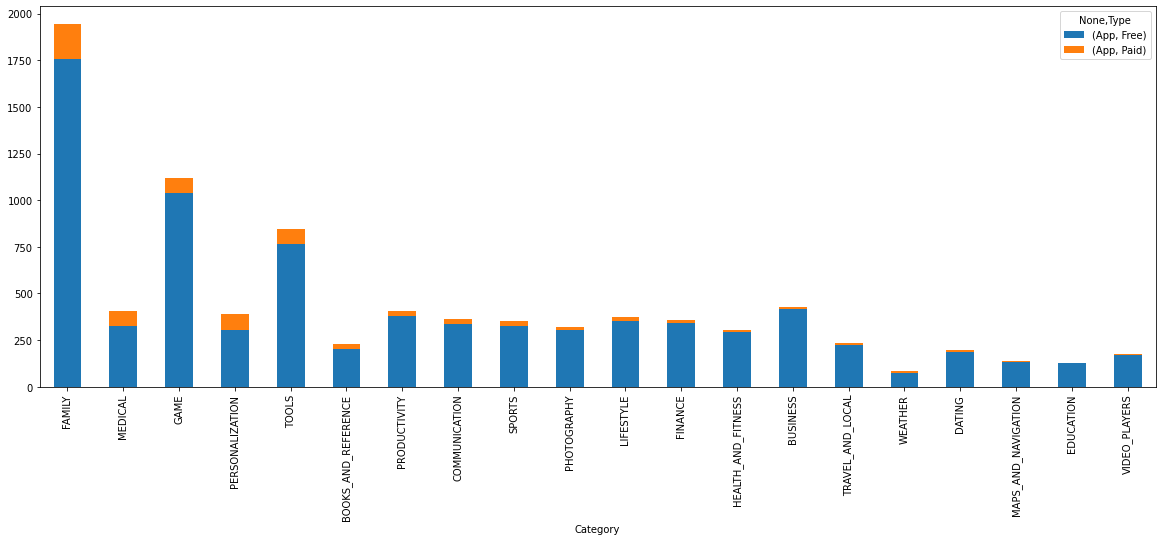

In [219]:
app_count_by_category_sorted_by_paid=df1.groupby(['Category','Type'])[['App']].count().unstack().sort_values(by=[('App', 'Paid')],ascending=False).head(20)
app_count_by_category_sorted_by_paid.plot(kind='bar',stacked=True, figsize=(20,7))

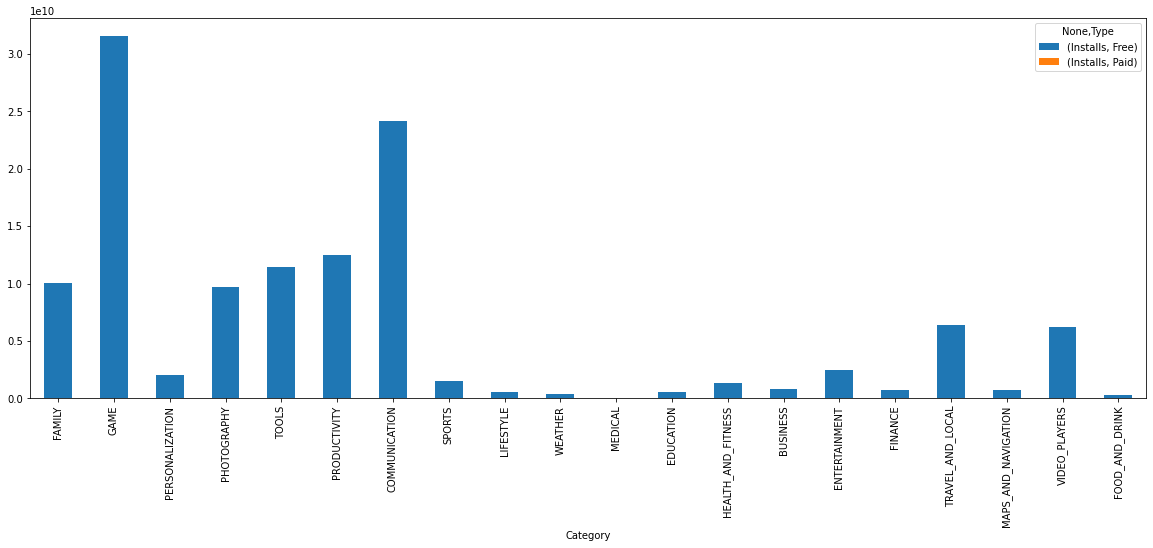

In [220]:
app_count_by_installs_and_category=df1.groupby(['Category','Type'])[['Installs']].sum().unstack().sort_values(by=[('Installs', 'Paid')],ascending=False).head(20)
app_count_by_installs_and_category.plot(kind='bar',stacked=True, figsize=(20,7))

In [221]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [47]:
#dropping duplicates
df2.drop_duplicates(inplace=True)

In [234]:
infodata(df2)

,App,count_of_NaN_values,unique_number_of_daata,datatype
0,App,0,1074,object
1,Translated_Review,987,27994,object
2,Sentiment,982,3,object
3,Sentiment_Polarity,982,6195,float64
4,Sentiment_Subjectivity,982,4530,float64


In [48]:
df2[df2.Sentiment.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
628,2RedBeans,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


It looks like all NAN values are not present for all columns except app name so its better to drop all

In [49]:
df2.dropna(inplace=True)

In [50]:
df2.reset_index(inplace=True,drop=True)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64


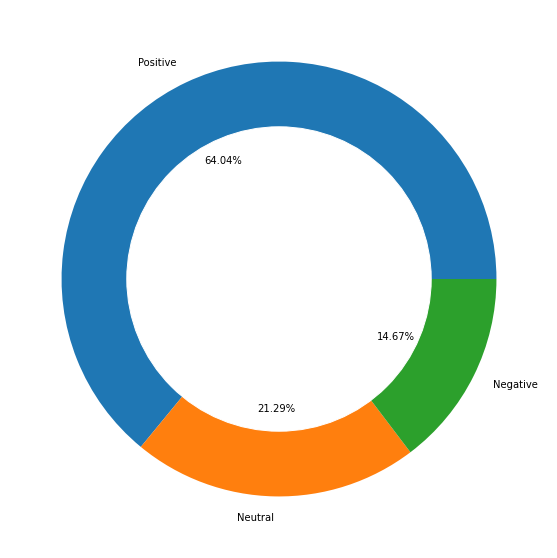

In [54]:
print(df2.Sentiment.value_counts())
plt.figure(figsize=(20,10))

plt.pie(df2.Sentiment.value_counts(),labels=df2.Sentiment.unique(), autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

From above donut chart it is clear that we got around 64% positive sentiments through reviews.

In [63]:
merged_df = pd.merge(df2, df1[["App",'Category',"Type"]] , how='inner', on="App")

# Drop null values from sentiment data
merged_df = merged_df.dropna()

merged_df.shape

(40414, 7)

In [65]:
merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,Free
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,Free
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,Free
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Free
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,Free


In [87]:
free_apps.Type.unique()[0]

'Free'

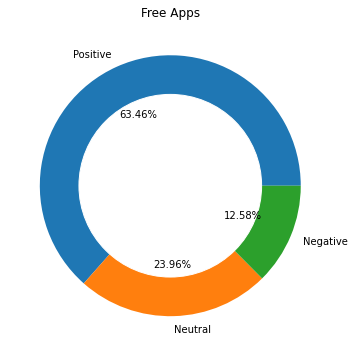

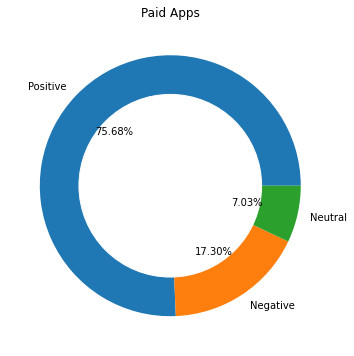

In [89]:

free_apps = merged_df[merged_df["Type"] == "Free"]
paid_apps = merged_df[merged_df["Type"] == "Paid"]
for i in [free_apps,paid_apps]:
  plt.figure(figsize=(10,6))
  plt.title(i.Type.unique()[0]+' Apps')
  plt.pie(i.Sentiment.value_counts(),labels=i.Sentiment.unique(), autopct='%1.2f%%')
  my_circle=plt.Circle( (0,0), 0.7, color='white')
  p=plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

Text(20.200000000000017, 0.5, 'Review Counts')

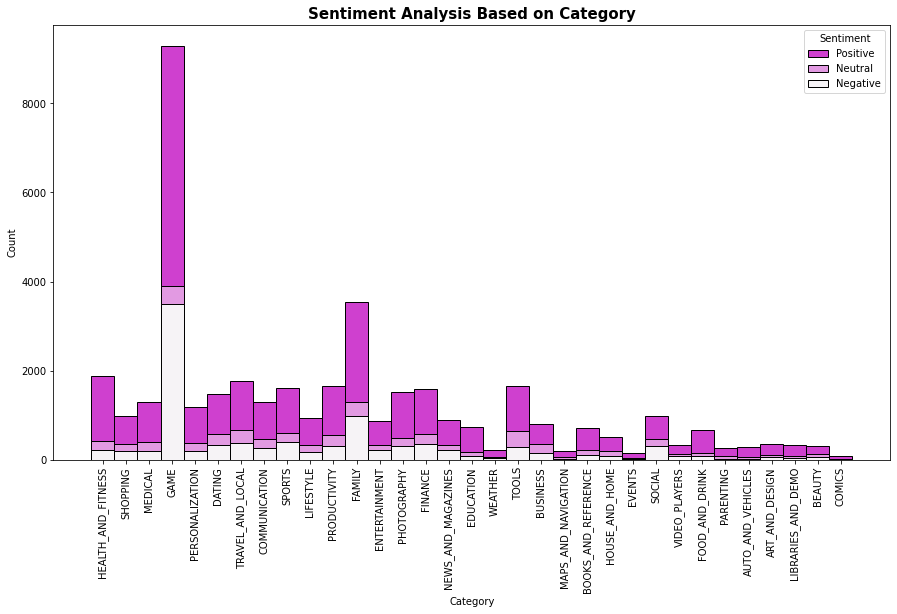

In [94]:
f = plt.figure(figsize=(15,8))
sns.histplot(
    merged_df,
    x="Category", hue="Sentiment",
    bins=34,
    stat="count",
    multiple="stack",
    palette="light:m_r",
    legend=True
    )


plt.title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=13)
ax.set_ylabel("Review Counts",fontsize=13)

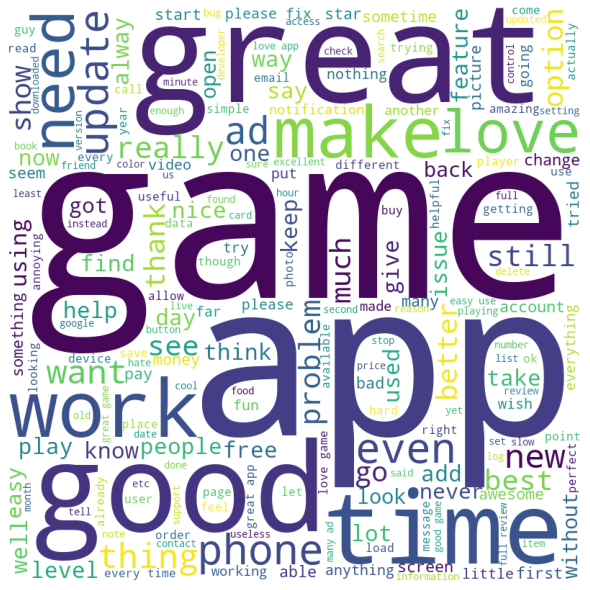

In [95]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df2.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
